In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from IPython.display import HTML

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3

train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse',
)

Found 1506 images belonging to 3 classes.


In [40]:
train_generator.class_indices


{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [41]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
for image_batch,label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.7250879  0.71166414 0.72528905]
  [0.7515349  0.73192704 0.7476133 ]
  [0.7369467  0.71555877 0.73124504]
  ...
  [0.5348323  0.5073813  0.5348323 ]
  [0.5566311  0.5291801  0.5566311 ]
  [0.5784299  0.55097884 0.5784299 ]]

 [[0.7228521  0.7111052  0.72417116]
  [0.7459455  0.7263377  0.74202394]
  [0.7481256  0.7272966  0.74298286]
  ...
  [0.6763803  0.6489293  0.6763803 ]
  [0.6903539  0.6629029  0.6903539 ]
  [0.7043274  0.6768764  0.7043274 ]]

 [[0.72061634 0.71054626 0.7230533 ]
  [0.7403561  0.72074825 0.7364345 ]
  [0.75930446 0.73903435 0.7547206 ]
  ...
  [0.7211023  0.6936513  0.7211023 ]
  [0.6909194  0.6634684  0.6909194 ]
  [0.6607365  0.6332855  0.6607365 ]]

 ...

 [[0.6513418  0.6395771  0.68271434]
  [0.6524596  0.6406949  0.68383217]
  [0.65357757 0.6418128  0.6849501 ]
  ...
  [0.43931934 0.4079468  0.45892718]
  [0.50219715 0.47082463 0.52180505]
  [0.40319365 0.3718211  0.4228015 ]]

 [[0.654902   0.6431373  0.6862745 ]
  [0.654902   0.6431373  0.6862745 ]


In [8]:
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True
)
validation_generator = validation_datagen.flow_from_directory(
    'dataset/val',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [9]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True
)
test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [15]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 30, 30, 64)       

In [17]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [23]:
history=model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=10,
    
)

Epoch 1/10
47/47 [==============================] - 190s 4s/step - loss: 0.1579 - accuracy: 0.9376 - val_loss: 0.2852 - val_accuracy: 0.8802
Epoch 2/10
47/47 [==============================] - 175s 4s/step - loss: 0.1253 - accuracy: 0.9525 - val_loss: 0.0938 - val_accuracy: 0.9792
Epoch 3/10
47/47 [==============================] - 185s 4s/step - loss: 0.0630 - accuracy: 0.9790 - val_loss: 0.0632 - val_accuracy: 0.9688
Epoch 4/10
47/47 [==============================] - 188s 4s/step - loss: 0.1003 - accuracy: 0.9668 - val_loss: 0.0965 - val_accuracy: 0.9635
Epoch 5/10
47/47 [==============================] - 166s 4s/step - loss: 0.0748 - accuracy: 0.9749 - val_loss: 0.1275 - val_accuracy: 0.9375
Epoch 6/10
47/47 [==============================] - 167s 4s/step - loss: 0.0475 - accuracy: 0.9830 - val_loss: 0.7183 - val_accuracy: 0.8073
Epoch 7/10
47/47 [==============================] - 147s 3s/step - loss: 0.1139 - accuracy: 0.9573 - val_loss: 0.1539 - val_accuracy: 0.9323
Epoch 8/10
47

In [24]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 13s 926ms/step - loss: 0.0892 - accuracy: 0.9814


In [25]:
scores

[0.08921197801828384, 0.9814385175704956]

Plotting the Accuracy and Loss Curves

In [26]:
history

In [27]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 47}

In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [29]:
type(history.history['loss'])

list

In [30]:
len(history.history['loss'])

10

In [31]:
history.history['loss'][:5] # show loss for first 5 epochs


[0.15787193179130554,
 0.12526248395442963,
 0.06302225589752197,
 0.10026925057172775,
 0.07481437921524048]

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [33]:
val_acc


[0.8802083134651184,
 0.9791666865348816,
 0.96875,
 0.9635416865348816,
 0.9375,
 0.8072916865348816,
 0.9322916865348816,
 0.9635416865348816,
 0.9739583134651184,
 0.9895833134651184]

In [34]:
acc

[0.9375848174095154,
 0.9525101780891418,
 0.9789687991142273,
 0.9667571187019348,
 0.9748982191085815,
 0.9830393195152283,
 0.9572591781616211,
 0.9796472191810608,
 0.9864314794540405,
 0.9891451597213745]

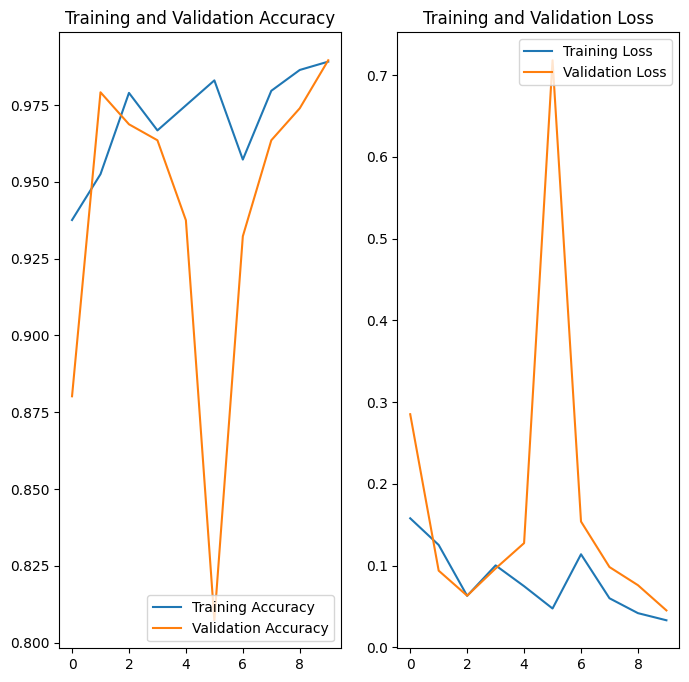

In [37]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.plot(range(10), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Run prediction on a sample image

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 1s 879ms/step
predicted label: Potato___Early_blight


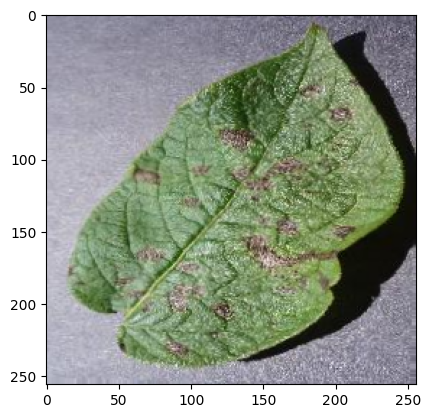

In [43]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

Write a function for inference

In [44]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

Now run inference on few sample images

1/1 [==============================] - 0s 47ms/step


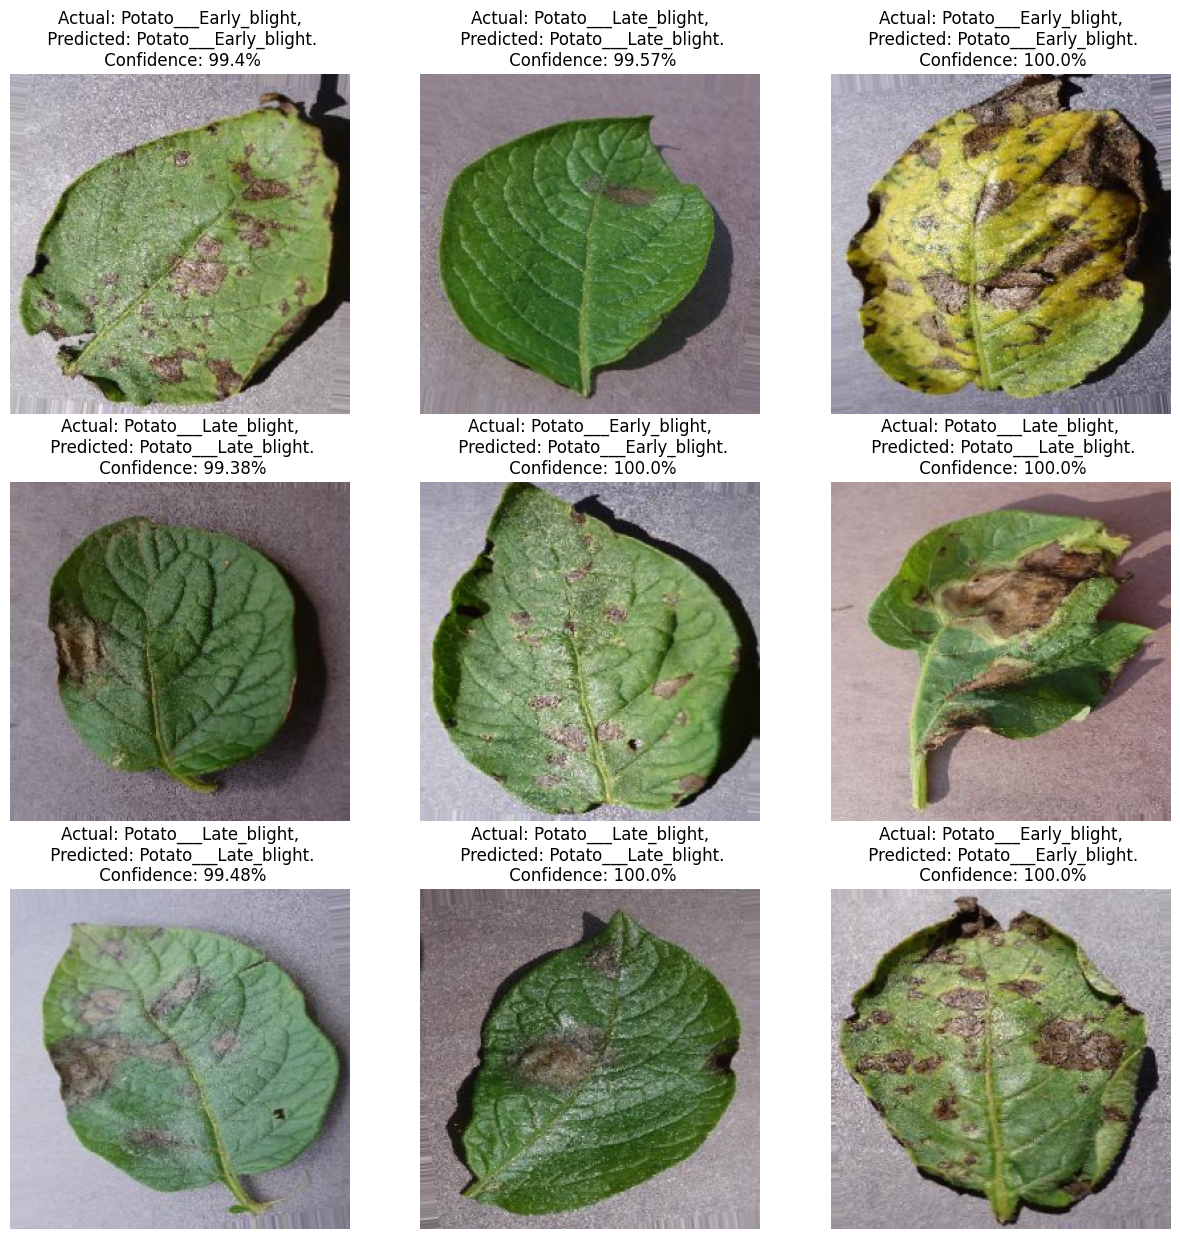

In [45]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

Saving the Model
Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [46]:
model.save("../potatoes.h5")

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:2985: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
